# Prediction of housing prices

## Housing Case Study

#### Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —


- To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

- To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

- To know the accuracy of the model, i.e. how well these variables can predict house prices.

**So interpretation is important!**

## Step-1 : Read and understand the data

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, sklearn, statsmodels.api as sm

In [2]:
# read the dataset
housing = pd.read_csv('Housing.csv')
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
housing.shape

(545, 13)

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


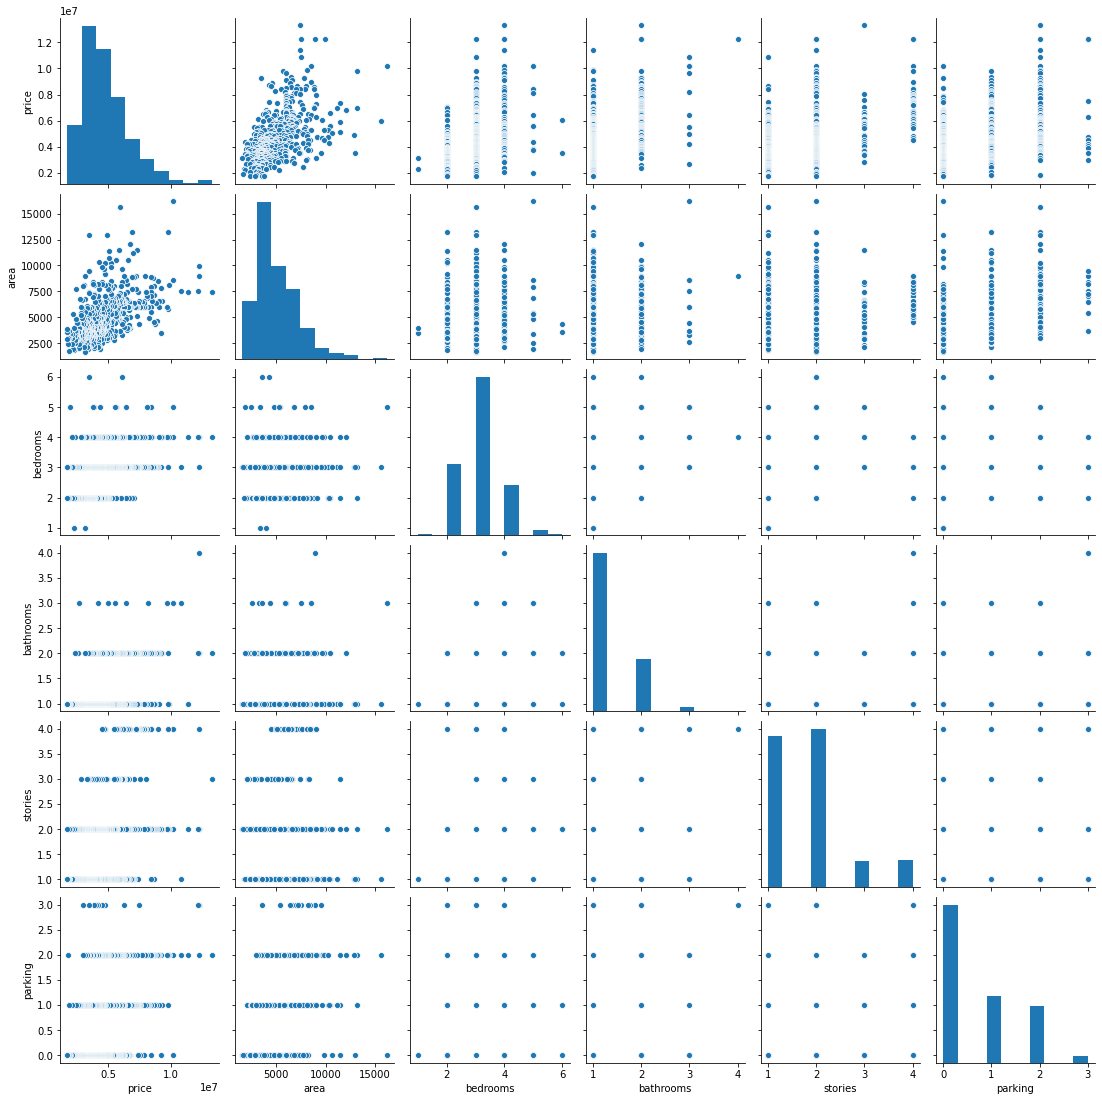

In [6]:
sns.pairplot(housing)
plt.show()

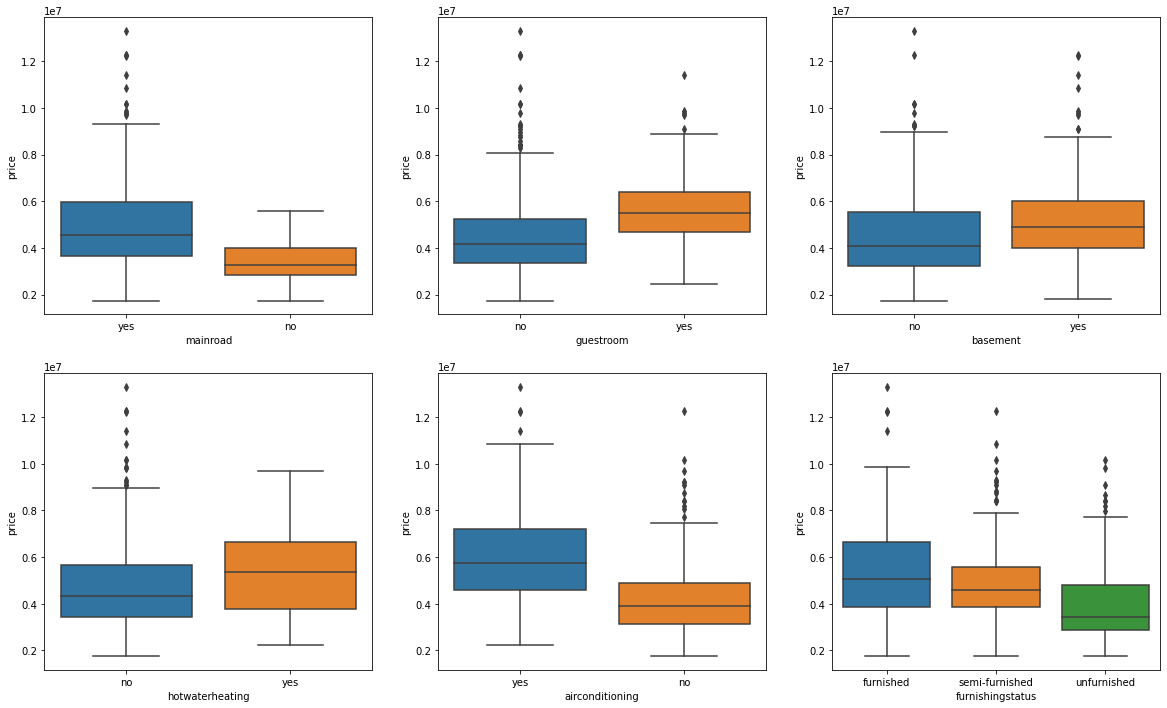

In [7]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = housing)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = housing)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = housing)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = housing)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = housing)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = housing)
plt.show()

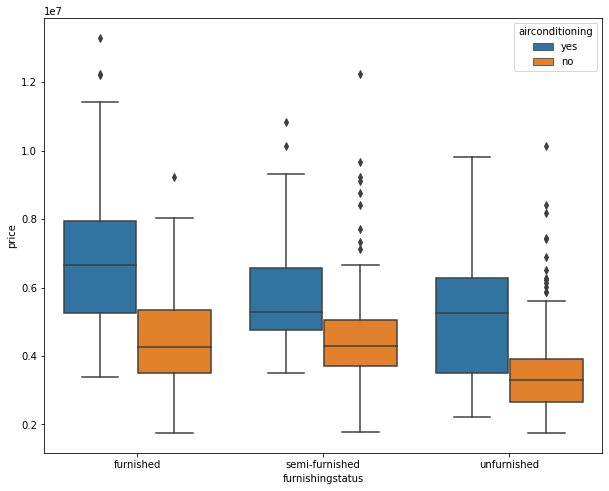

In [8]:
plt.figure(figsize=(10, 8))
sns.boxplot(x = 'furnishingstatus', y = 'price', data = housing, hue='airconditioning')
plt.show()

## Step-2: Prepare Data for modeling

In [9]:
# Select all yes/no variables
varlist = []
for item in housing.select_dtypes(include='object').columns:
    if housing[item].nunique() == 2:
        varlist.append(item)
print (varlist)

['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']


In [10]:
housing[varlist] = housing[varlist].apply(lambda x: x.map({'yes': 1, 'no':0}))
housing[varlist].head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,1,0,0,0,1,1
1,1,0,0,0,1,0
2,1,0,1,0,0,1
3,1,0,1,0,1,1
4,1,1,1,0,1,0


In [11]:
# Dummy Variables for furnishingstatus
status = pd.get_dummies(housing['furnishingstatus'])
status.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


drop the `furnished` column, as the type of furnishing can be identified with just the last two columns where — 
- `00` will correspond to `furnished`
- `01` will correspond to `unfurnished`
- `10` will correspond to `semi-furnished`

In [12]:
status = pd.get_dummies(housing['furnishingstatus'], drop_first=True)
status.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [13]:
housing = pd.concat([housing, status], axis=1)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [14]:
housing.drop(columns='furnishingstatus', inplace=True)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [15]:
#sns.pairplot(housing)
#plt.show()

### Splitting and Standardization / Normalization

In [16]:
# Split the whole dataframe in one go !

from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(housing, train_size = 0.7, random_state=100)
print (housing.shape, df_train.shape, df_test.shape)

(545, 14) (381, 14) (164, 14)


In [17]:
# Normalization over standardization because we are dealing with price and standardization would go to negative prices

from sklearn.preprocessing import MinMaxScaler
num_vars = ['price','area', 'bedrooms', 'bathrooms', 'stories', 'parking']

scaler = MinMaxScaler()

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


## Step-3: Training the model

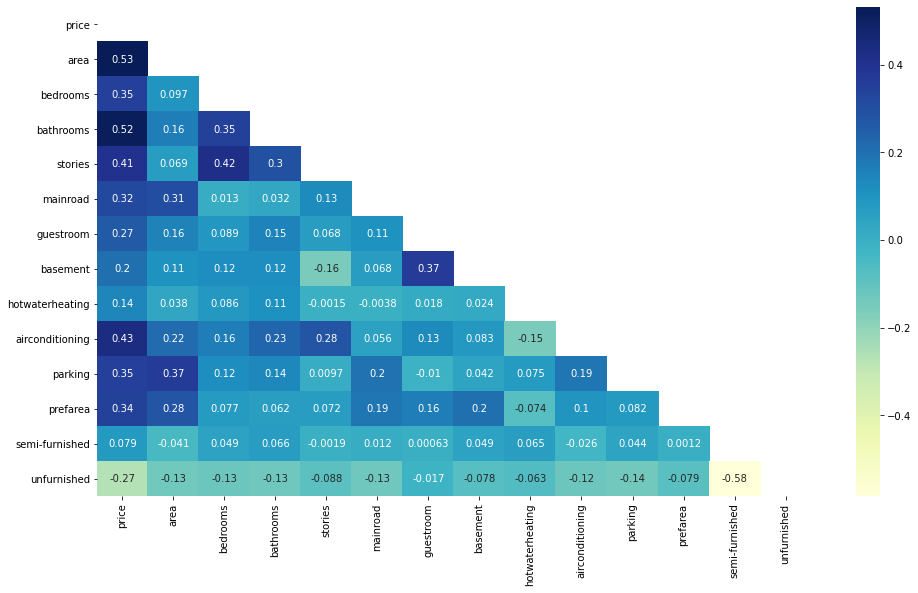

In [18]:
plt.figure(figsize = (16,9))
mask1 = np.zeros_like(df_train.corr()) # Makes a NP array of 0 with size like the matrix supplied with
mask1[np.triu_indices_from(mask1)] = True # Makes the segment below the diagonal as 0 and rest as 1
sns.heatmap(df_train.corr(), mask= mask1, annot=True, cmap= 'YlGnBu')
plt.show()

In [19]:
# X, y
y_train = df_train.pop('price')
X_train = df_train

In [20]:
# Statsmodel fit for 1 variable to start with
X_train_sm = sm.add_constant(X_train['area'])

lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()

lr_model.params

const    0.126894
area     0.462192
dtype: float64

In [21]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     149.6
Date:                Sat, 20 Mar 2021   Prob (F-statistic):           3.15e-29
Time:                        18:20:32   Log-Likelihood:                 227.23
No. Observations:                 381   AIC:                            -450.5
Df Residuals:                     379   BIC:                            -442.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1269      0.013      9.853      0.000       0.102       0.152
area           0.4622      0.038     12.232      0.000       0.388       0.536
==============================================================================
Omnibus:                       67.313   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.063
Skew:                           0.925   Prob(JB):                     8.59e-32
Kurtosis:                       5.365   Cond. No.                         5.99
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
# Add another variable - MLR in a forward sense
# Selected bathrooms because it had second highest coefficient of correlation

X_train_sm = X_train [['area', 'bathrooms']]
X_train_sm = sm.add_constant(X_train_sm)

lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.params

const        0.104589
area         0.398396
bathrooms    0.298374
dtype: float64

In [23]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     174.1
Date:                Sat, 20 Mar 2021   Prob (F-statistic):           2.51e-54
Time:                        18:20:32   Log-Likelihood:                 288.24
No. Observations:                 381   AIC:                            -570.5
Df Residuals:                     378   BIC:                            -558.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1046      0.011      9.384      0.000       0.083       0.127
area           0.3984      0.033     12.192      0.000       0.334       0.463
bathrooms      0.2984      0.025     11.945      0.000       0.249       0.347
==============================================================================
Omnibus:                       62.839   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.790
Skew:                           0.784   Prob(JB):                     2.23e-37
Kurtosis:                       5.859   Cond. No.                         6.17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
# Add another variable - MLR in a forward sense
# Selected bedrooms because it had second highest coefficient of correlation

X_train_sm = X_train [['area', 'bathrooms', 'bedrooms']]
X_train_sm = sm.add_constant(X_train_sm)

lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     128.2
Date:                Sat, 20 Mar 2021   Prob (F-statistic):           3.12e-57
Time:                        18:20:32   Log-Likelihood:                 297.76
No. Observations:                 381   AIC:                            -587.5
Df Residuals:                     377   BIC:                            -571.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0414      0.018      2.292      0.022       0.006       0.077
area           0.3922      0.032     12.279      0.000       0.329       0.455
bathrooms      0.2600      0.026     10.033      0.000       0.209       0.311
bedrooms       0.1819      0.041      4.396      0.000       0.101       0.263
==============================================================================
Omnibus:                       50.037   Durbin-Watson:                   2.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.806
Skew:                           0.648   Prob(JB):                     7.92e-28
Kurtosis:                       5.487   Cond. No.                         8.87
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Adding all the variables to the model

In [25]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     60.40
Date:                Sat, 20 Mar 2021   Prob (F-statistic):           8.83e-83
Time:                        18:20:32   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -735.6
Df Residuals:                     367   BIC:                            -680.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0200      0.021      0.955      0.340      -0.021       0.061
area                0.2347      0.030      7.795      0.000       0.175       0.294
bedrooms            0.0467      0.037      1.267      0.206      -0.026       0.119
bathrooms           0.1908      0.022      8.679      0.000       0.148       0.234
stories             0.1085      0.019      5.661      0.000       0.071       0.146
mainroad            0.0504      0.014      3.520      0.000       0.022       0.079
guestroom           0.0304      0.014      2.233      0.026       0.004       0.057
basement            0.0216      0.011      1.943      0.053      -0.000       0.043
hotwaterheating     0.0849      0.022      3.934      0.000       0.042       0.127
airconditioning     0.0669      0.011      5.899      0.000       0.045       0.089
parking             0.0607      0.018      3.365      0.001       0.025       0.096
prefarea            0.0594      0.012      5.040      0.000       0.036       0.083
semi-furnished      0.0009      0.012      0.078      0.938      -0.022       0.024
unfurnished        -0.0310      0.013     -2.440      0.015      -0.056      -0.006
==============================================================================
Omnibus:                       93.687   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              304.917
Skew:                           1.091   Prob(JB):                     6.14e-67
Kurtosis:                       6.801   Cond. No.                         14.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### VIF

In [26]:
def calc_VIF(X_train):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    df_vif = pd.DataFrame()
    df_vif['Features'] = X_train.columns
    df_vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    df_vif['VIF'] = round(df_vif['VIF'], 2)
    df_vif.sort_values(by='VIF', ascending=False, inplace=True)
    return df_vif

In [27]:
vif = calc_VIF(X_train)
vif

,Features,VIF
1,bedrooms,7.33
4,mainroad,6.02
0,area,4.67
3,stories,2.70
11,semi-furnished,2.19
9,parking,2.12
6,basement,2.02
12,unfurnished,1.82
8,airconditioning,1.77
2,bathrooms,1.67


In [28]:
# Drop semi-furnished since it has high p-value
X_train_1 = X_train.drop(columns='semi-furnished')
X_train_sm = sm.add_constant(X_train_1)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     65.61
Date:                Sat, 20 Mar 2021   Prob (F-statistic):           1.07e-83
Time:                        18:20:32   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -737.6
Df Residuals:                     368   BIC:                            -686.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0207      0.019      1.098      0.273      -0.016       0.058
area                0.2344      0.030      7.845      0.000       0.176       0.293
bedrooms            0.0467      0.037      1.268      0.206      -0.026       0.119
bathrooms           0.1909      0.022      8.697      0.000       0.148       0.234
stories             0.1085      0.019      5.669      0.000       0.071       0.146
mainroad            0.0504      0.014      3.524      0.000       0.022       0.079
guestroom           0.0304      0.014      2.238      0.026       0.004       0.057
basement            0.0216      0.011      1.946      0.052      -0.000       0.043
hotwaterheating     0.0849      0.022      3.941      0.000       0.043       0.127
airconditioning     0.0668      0.011      5.923      0.000       0.045       0.089
parking             0.0608      0.018      3.372      0.001       0.025       0.096
prefarea            0.0594      0.012      5.046      0.000       0.036       0.083
unfurnished        -0.0316      0.010     -3.096      0.002      -0.052      -0.012
==============================================================================
Omnibus:                       93.538   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              303.844
Skew:                           1.090   Prob(JB):                     1.05e-66
Kurtosis:                       6.794   Cond. No.                         14.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
vif = calc_VIF(X_train_1)
vif

,Features,VIF
1,bedrooms,6.59
4,mainroad,5.68
0,area,4.67
3,stories,2.69
9,parking,2.12
6,basement,2.01
8,airconditioning,1.77
2,bathrooms,1.67
10,prefarea,1.51
5,guestroom,1.47


In [30]:
# Drop bedrooms since it has high p-value
X_train_2 = X_train_1.drop(columns='bedrooms')
X_train_sm = sm.add_constant(X_train_2)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     71.31
Date:                Sat, 20 Mar 2021   Prob (F-statistic):           2.73e-84
Time:                        18:20:32   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -737.9
Df Residuals:                     369   BIC:                            -690.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0357      0.015      2.421      0.016       0.007       0.065
area                0.2347      0.030      7.851      0.000       0.176       0.294
bathrooms           0.1965      0.022      9.132      0.000       0.154       0.239
stories             0.1178      0.018      6.654      0.000       0.083       0.153
mainroad            0.0488      0.014      3.423      0.001       0.021       0.077
guestroom           0.0301      0.014      2.211      0.028       0.003       0.057
basement            0.0239      0.011      2.183      0.030       0.002       0.045
hotwaterheating     0.0864      0.022      4.014      0.000       0.044       0.129
airconditioning     0.0665      0.011      5.895      0.000       0.044       0.089
parking             0.0629      0.018      3.501      0.001       0.028       0.098
prefarea            0.0596      0.012      5.061      0.000       0.036       0.083
unfurnished        -0.0323      0.010     -3.169      0.002      -0.052      -0.012
==============================================================================
Omnibus:                       97.661   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              325.388
Skew:                           1.130   Prob(JB):                     2.20e-71
Kurtosis:                       6.923   Cond. No.                         10.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
vif = calc_VIF(X_train_2)
vif

,Features,VIF
3,mainroad,4.79
0,area,4.55
2,stories,2.23
8,parking,2.10
5,basement,1.87
7,airconditioning,1.76
1,bathrooms,1.61
9,prefarea,1.50
4,guestroom,1.46
10,unfurnished,1.33


## Step-4: Residual Analysis

In [32]:
# Predict y
y_train_pred = lr_model.predict(X_train_sm)

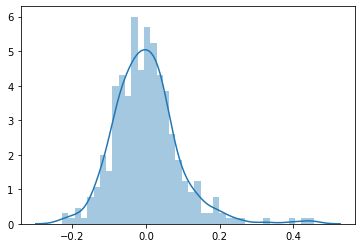

In [33]:
# Plot Residuals
res = y_train - y_train_pred
sns.distplot(res,bins=40)
plt.show()

In [34]:
print ('{} is the mean of errors'.format(res.mean()))

-2.124284999873331e-16 is the mean of errors


## Step-5: Predictions and Evalulation of the Test Set

In [35]:
df_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,4403000,2880,3,1,2,1,0,0,0,0,0,1,1,0
54,7350000,6000,3,2,2,1,1,0,0,1,1,0,1,0
171,5250000,10269,3,1,1,1,0,0,0,0,1,1,1,0
244,4550000,5320,3,1,2,1,1,1,0,0,0,1,1,0
268,4382000,4950,4,1,2,1,0,0,0,1,0,0,1,0


In [36]:
# Never fit() or fit_transform() on test data set. Only use transform()

from sklearn.preprocessing import MinMaxScaler
num_vars = ['price','area', 'bedrooms', 'bathrooms', 'stories', 'parking']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,0.229697,0.091869,0.4,0.0,0.333333,1,0,0,0,0,0.000000,1,1,0
54,0.484848,0.366420,0.4,0.5,0.333333,1,1,0,0,1,0.333333,0,1,0
171,0.303030,0.742080,0.4,0.0,0.000000,1,0,0,0,0,0.333333,1,1,0
244,0.242424,0.306582,0.4,0.0,0.333333,1,1,1,0,0,0.000000,1,1,0
268,0.227879,0.274023,0.6,0.0,0.333333,1,0,0,0,1,0.000000,0,1,0


In [37]:
df_train.describe()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,0.288710,0.386352,0.136483,0.268591,0.855643,0.170604,0.351706,0.052493,0.299213,0.242345,0.233596,0.414698,0.325459
std,0.181420,0.147336,0.237325,0.295001,0.351913,0.376657,0.478131,0.223313,0.458515,0.285933,0.423674,0.493318,0.469162
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.155227,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.234424,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.398099,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
df_test.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,0.263176,0.298548,0.408537,0.158537,0.268293,0.865854,0.195122,0.347561,0.030488,0.353659,0.205285,0.237805,0.420732,0.329268
std,0.172077,0.211922,0.147537,0.281081,0.276007,0.341853,0.397508,0.477654,0.172452,0.479569,0.289322,0.427043,0.495189,0.471387
min,0.006061,-0.016367,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142424,0.148011,0.400000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.226061,0.259724,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.346970,0.397439,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,0.909091,1.263992,0.800000,1.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
y_test = df_test.pop('price')
X_test = df_test

In [40]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,1.0,0.091869,0.4,0.0,0.333333,1,0,0,0,0,0.000000,1,1,0
54,1.0,0.366420,0.4,0.5,0.333333,1,1,0,0,1,0.333333,0,1,0
171,1.0,0.742080,0.4,0.0,0.000000,1,0,0,0,0,0.333333,1,1,0
244,1.0,0.306582,0.4,0.0,0.333333,1,1,1,0,0,0.000000,1,1,0
268,1.0,0.274023,0.6,0.0,0.333333,1,0,0,0,1,0.000000,0,1,0


In [41]:
X_test_sm = X_test_sm[list(X_train_sm.columns)]

In [42]:
# Predict y
y_test_pred = lr_model.predict(X_test_sm)

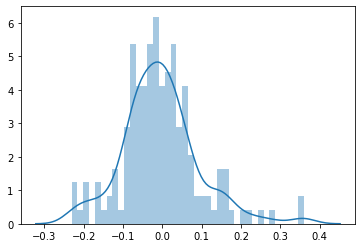

In [43]:
# Plot Residuals
res = y_test - y_test_pred
sns.distplot(res,bins=40)
plt.show()

In [44]:
print ('{} is the mean of errors'.format(res.mean()))

-0.004420175824978177 is the mean of errors


In [45]:
# R2 score analysis

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

r2_score_test = r2_score(y_true=y_test, y_pred=y_test_pred)
print ('{:.4f} is the R-squared of test data set'.format(r2_score_test))

r2_score_train = r2_score(y_true=y_train, y_pred=y_train_pred)
print ('{:.4f} is the R-squared of train data set'.format(r2_score_train))

rss_score_test = mean_squared_error(y_true=y_test, y_pred=y_test_pred)
print ('{:.5f} is the RSS of test data set'.format(rss_score_test))

rss_score_train = mean_squared_error(y_true=y_train, y_pred=y_train_pred)
print ('{:.5f} is the RSS of train data set'.format(rss_score_train))

0.6714 is the R-squared of test data set
0.6801 is the R-squared of train data set
0.00967 is the RSS of test data set
0.00793 is the RSS of train data set


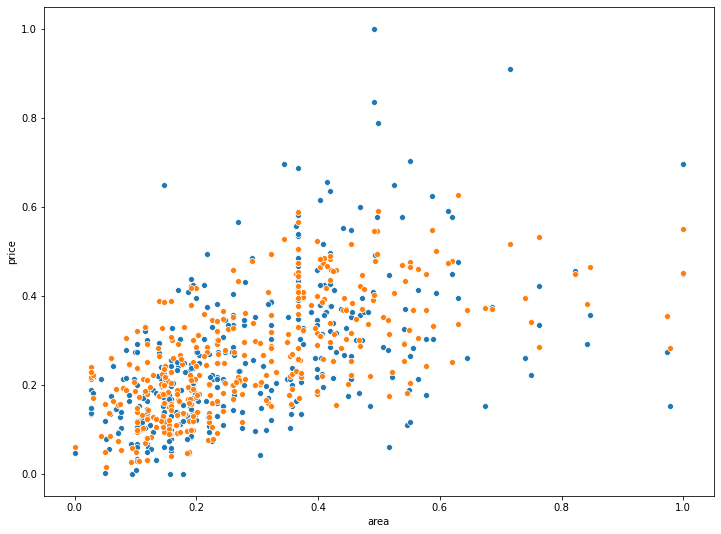

In [46]:
plt.figure(figsize=(12,9))
sns.scatterplot(x=X_train_sm['area'], y=y_train)
sns.scatterplot(x=X_train_sm['area'], y=y_train_pred)
plt.show()

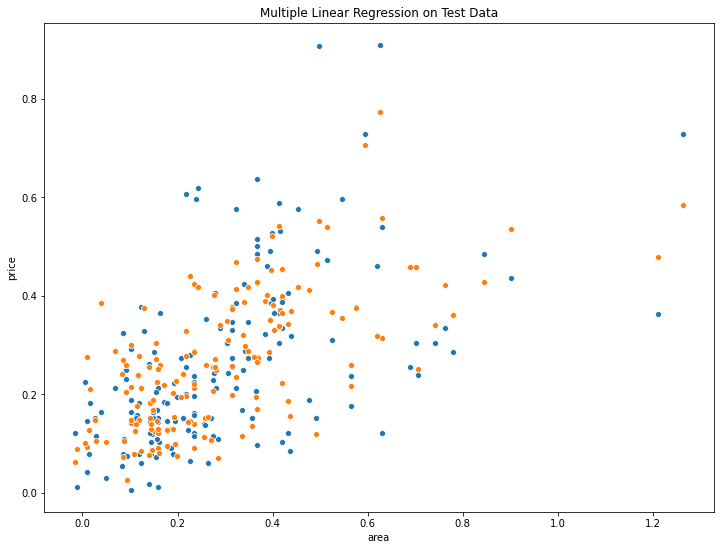

In [47]:
plt.figure(figsize=(12,9))
sns.scatterplot(x=X_test_sm['area'], y=y_test)
sns.scatterplot(x=X_test_sm['area'], y=y_test_pred)
plt.title('Multiple Linear Regression on Test Data')
plt.show()

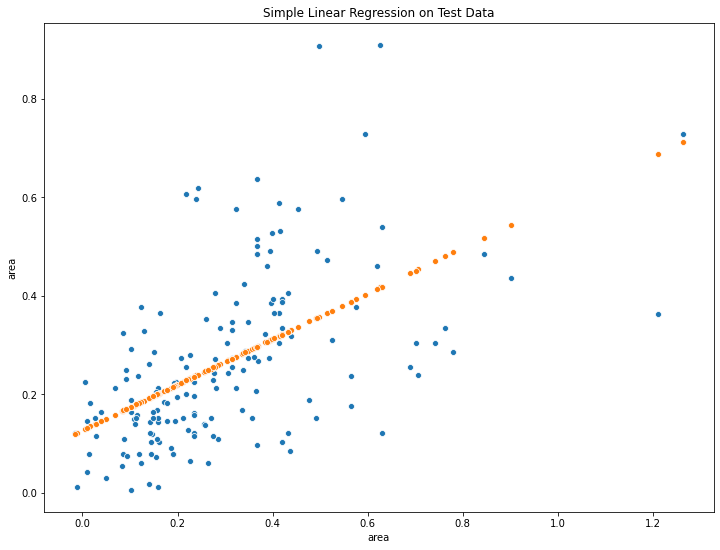

In [48]:
plt.figure(figsize=(12,9))
sns.scatterplot(x=X_test_sm['area'], y=y_test)
sns.scatterplot(x=X_test_sm['area'], y=0.126894+0.462192*X_test_sm['area'])
plt.title('Simple Linear Regression on Test Data')
plt.show()

In [49]:
r2_score_test = r2_score(y_true=y_test, y_pred=y_test_pred)
print ('{:.4f} is the R-squared of test data set with MLR'.format(r2_score_test))

r2_score_test_SLR = r2_score(y_true=y_test, y_pred= 0.126894+0.462192*X_test_sm['area'])
print ('{:.4f} is the R-squared of test data set with SLR'.format(r2_score_test_SLR))

0.6714 is the R-squared of test data set with MLR
0.2952 is the R-squared of test data set with SLR


In [50]:
lr_model.params

const              0.035722
area               0.234746
bathrooms          0.196480
stories            0.117751
mainroad           0.048798
guestroom          0.030097
basement           0.023917
hotwaterheating    0.086403
airconditioning    0.066533
parking            0.062872
prefarea           0.059643
unfurnished       -0.032317
dtype: float64

We can see that the equation of our best fitted line (normalized MinMax) is:

$ price = 0.236  \times  area + 0.202  \times  bathrooms + 0.11 \times stories + 0.05 \times mainroad + 0.04 \times guestroom + 0.0876 \times hotwaterheating + 0.0682 \times airconditioning + 0.0629 \times parking + 0.0637 \times prefarea - 0.0337 \times unfurnished $

How to improve the model<br>'

1. Use derived features like ratio of bedrooms / bathroom and so on <br>
2. Nonlinear models <br>

## Automated Variable Selection Using Recursive Feature Elimination RFE

In [51]:
X_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


In [52]:
y_train.head()

359    0.169697
19     0.615152
159    0.321212
35     0.548133
28     0.575758
Name: price, dtype: float64

In [53]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [54]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,10)
rfe = rfe.fit(X_train, y_train)

In [55]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('area', True, 1),
 ('bedrooms', True, 1),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', True, 1),
 ('guestroom', True, 1),
 ('basement', False, 3),
 ('hotwaterheating', True, 1),
 ('airconditioning', True, 1),
 ('parking', True, 1),
 ('prefarea', True, 1),
 ('semi-furnished', False, 4),
 ('unfurnished', False, 2)]

In [56]:
# Selected and Dropped features

rfe_sel_cols = list(X_train.columns[rfe.support_])
rfe_drp_cols = list(X_train.columns[~rfe.support_])

print (rfe_sel_cols)
print (rfe_drp_cols)

['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
['basement', 'semi-furnished', 'unfurnished']


In [57]:
# Create Statsmodels

X_train_rfe = X_train[rfe_sel_cols]
X_train_rfe_sm = sm.add_constant(X_train_rfe)
lm_rfe = sm.OLS(y_train, X_train_rfe_sm)
lm_rfe_model =  lm_rfe.fit()
lm_rfe_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     74.89
Date:                Sat, 20 Mar 2021   Prob (F-statistic):           1.28e-82
Time:                        18:20:36   Log-Likelihood:                 374.65
No. Observations:                 381   AIC:                            -727.3
Df Residuals:                     370   BIC:                            -683.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0027      0.018      0.151      0.880      -0.033       0.038
area                0.2363      0.030      7.787      0.000       0.177       0.296
bedrooms            0.0661      0.037      1.794      0.074      -0.006       0.139
bathrooms           0.1982      0.022      8.927      0.000       0.155       0.242
stories             0.0977      0.019      5.251      0.000       0.061       0.134
mainroad            0.0556      0.014      3.848      0.000       0.027       0.084
guestroom           0.0381      0.013      2.934      0.004       0.013       0.064
hotwaterheating     0.0897      0.022      4.104      0.000       0.047       0.133
airconditioning     0.0711      0.011      6.235      0.000       0.049       0.093
parking             0.0637      0.018      3.488      0.001       0.028       0.100
prefarea            0.0643      0.012      5.445      0.000       0.041       0.088
==============================================================================
Omnibus:                       86.105   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              286.069
Skew:                           0.992   Prob(JB):                     7.60e-63
Kurtosis:                       6.753   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
# Drop bedrooms

X_train_rfe = X_train[rfe_sel_cols].drop(columns='bedrooms')
X_train_rfe_sm = sm.add_constant(X_train_rfe)
lm_rfe = sm.OLS(y_train, X_train_rfe_sm)
lm_rfe_model =  lm_rfe.fit()
lm_rfe_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     82.37
Date:                Sat, 20 Mar 2021   Prob (F-statistic):           6.67e-83
Time:                        18:20:36   Log-Likelihood:                 373.00
No. Observations:                 381   AIC:                            -726.0
Df Residuals:                     371   BIC:                            -686.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0242      0.013      1.794      0.074      -0.002       0.051
area                0.2367      0.030      7.779      0.000       0.177       0.297
bathrooms           0.2070      0.022      9.537      0.000       0.164       0.250
stories             0.1096      0.017      6.280      0.000       0.075       0.144
mainroad            0.0536      0.014      3.710      0.000       0.025       0.082
guestroom           0.0390      0.013      2.991      0.003       0.013       0.065
hotwaterheating     0.0921      0.022      4.213      0.000       0.049       0.135
airconditioning     0.0710      0.011      6.212      0.000       0.049       0.094
parking             0.0669      0.018      3.665      0.000       0.031       0.103
prefarea            0.0653      0.012      5.513      0.000       0.042       0.089
==============================================================================
Omnibus:                       91.542   Durbin-Watson:                   2.107
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              315.402
Skew:                           1.044   Prob(JB):                     3.25e-69
Kurtosis:                       6.938   Cond. No.                         10.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
vif = calc_VIF(X_train_rfe)
vif

,Features,VIF
0,area,4.52
3,mainroad,4.26
2,stories,2.12
7,parking,2.10
6,airconditioning,1.75
1,bathrooms,1.58
8,prefarea,1.47
4,guestroom,1.30
5,hotwaterheating,1.12


In [60]:
# Predict y
y_train_pred = lm_rfe_model.predict(X_train_rfe_sm)

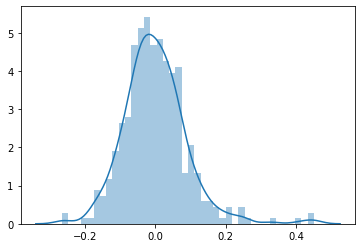

In [61]:
# Plot Residuals
res = y_train - y_train_pred
sns.distplot(res,bins=40)
plt.show()

In [62]:
# Predict y

X_test_rfe_sm = X_test_sm[list(X_train_rfe_sm.columns)]
y_test_pred_rfe = lm_rfe_model.predict(X_test_rfe_sm)

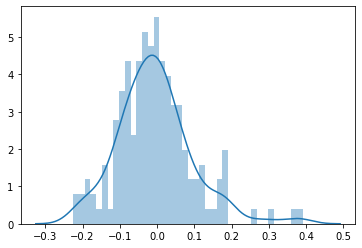

In [63]:
# Plot Residuals
res = y_test - y_test_pred_rfe
sns.distplot(res,bins=40)
plt.show()

In [64]:
# R2 score analysis

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print ('Results from RFE')
r2_score_test = r2_score(y_true=y_test, y_pred=y_test_pred_rfe)
print ('{:.4f} is the R-squared of test data set'.format(r2_score_test))

r2_score_train = r2_score(y_true=y_train, y_pred=y_train_pred)
print ('{:.4f} is the R-squared of train data set'.format(r2_score_train))

rss_score_test = mean_squared_error(y_true=y_test, y_pred=y_test_pred_rfe)
print ('{:.5f} is the RSS of test data set'.format(rss_score_test))

rss_score_train = mean_squared_error(y_true=y_train, y_pred=y_train_pred)
print ('{:.5f} is the RSS of train data set'.format(rss_score_train))

Results from RFE
0.6482 is the R-squared of test data set
0.6665 is the R-squared of train data set
0.01035 is the RSS of test data set
0.00826 is the RSS of train data set


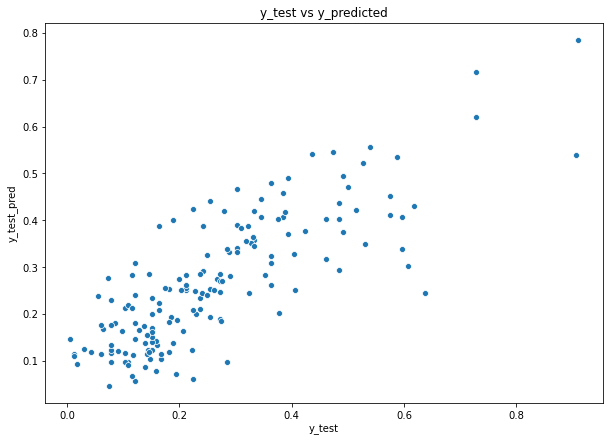

In [65]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=y_test, y=y_test_pred_rfe)
plt.xlabel('y_test')
plt.ylabel('y_test_pred')
plt.title('y_test vs y_predicted')
plt.show()

In [66]:
# Coefficients from RFE 

lm_rfe_model.params

const              0.024223
area               0.236688
bathrooms          0.207021
stories            0.109585
mainroad           0.053643
guestroom          0.038979
hotwaterheating    0.092143
airconditioning    0.071028
parking            0.066868
prefarea           0.065258
dtype: float64

In [67]:
# Coefficients from Manual Selection

lr_model.params

const              0.035722
area               0.234746
bathrooms          0.196480
stories            0.117751
mainroad           0.048798
guestroom          0.030097
basement           0.023917
hotwaterheating    0.086403
airconditioning    0.066533
parking            0.062872
prefarea           0.059643
unfurnished       -0.032317
dtype: float64

## Gradient Descent applied to MLR

In [68]:
X_train_gdm = X_train_sm
y_train_gdm = y_train

In [69]:
X_test_gdm = X_test_sm
y_test_gdm = y_test

In [70]:
X_train_gdm_np = np.array(X_train_gdm)
y_train_gdm_np = np.array(y_train_gdm)

<img src = 'IMG1_GDM.png'>

<img src = 'IMG2_GDM.png'>

In [71]:
def gradient_descent_mlr(X, y, niter = 1000, learn_rate= 0.01):
    theta = np.zeros(X.shape[1])
    m = len(X)
    grad_desc_mlr = pd.DataFrame(columns = ['Betas','CostFunction'])
    for i in range(niter):
        gradient = (1/m) * np.matmul(X.T, np.matmul(X, theta) - y) # Gradient Function
        theta = theta - learn_rate * gradient # Update of Betas
        cost = np.sum(np.square(np.matmul(X, theta) - y)) / (2 * m) # Cost Function
        grad_desc_mlr.loc[i] = [theta,cost]
    return grad_desc_mlr

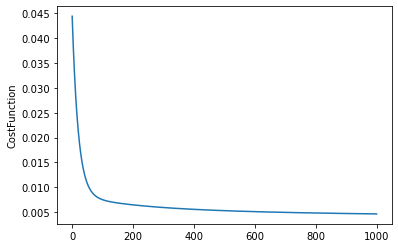

In [72]:
gradients = gradient_descent_mlr(X_train_gdm_np,y_train_gdm_np)
sns.lineplot(x=gradients.index, y=gradients['CostFunction'])
plt.show()

In [73]:
coeff_gdm = list(gradients.iloc[-1,0])

In [74]:
print (coeff_gdm)

[0.07277052208184147, 0.08630162679734539, 0.10720279079192449, 0.0932939202270052, 0.07259275736962202, 0.03906290979551932, 0.02791577316342671, 0.045058435875788366, 0.08464870221803455, 0.0689379145921199, 0.06419811523631251, -0.04111411188880769]


In [75]:
X_train_sm.columns

Index(['const', 'area', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'unfurnished'],
      dtype='object')

## Decision Tree Regressor

In [118]:
# read the dataset
housing = pd.read_csv('Housing.csv')
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [119]:
# Select all yes/no variables
varlist = []
for item in housing.select_dtypes(include='object').columns:
    if housing[item].nunique() == 2:
        varlist.append(item)
print (varlist)

['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']


In [120]:
housing[varlist] = housing[varlist].apply(lambda x: x.map({'yes': 1, 'no':0}))
housing[varlist].head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,1,0,0,0,1,1
1,1,0,0,0,1,0
2,1,0,1,0,0,1
3,1,0,1,0,1,1
4,1,1,1,0,1,0


In [121]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [122]:
housing.furnishingstatus.unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [123]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
#housing['furnishingstatus'] = housing[['furnishingstatus']].apply(le.fit_transform)

housing['furnishingstatus'] = housing[['furnishingstatus']].apply(lambda x: x.map({'furnished': 2, 
                                                                                   'semi-furnished':1,
                                                                                   'unfurnished': 0}))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


In [124]:
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size=0.7, random_state=100)

In [125]:
df_train.shape, df_test.shape

((381, 13), (164, 13))

In [126]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
df_train['price'] = scaler.fit_transform(df_train[['price']])
df_test['price'] = scaler.transform(df_test[['price']])

In [127]:
df_test.head(2)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
265,0.229697,2880,3,1,2,1,0,0,0,0,0,1,1
54,0.484848,6000,3,2,2,1,1,0,0,1,1,0,1


In [128]:
df_train.head(2)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
359,0.169697,3600,3,1,1,1,0,0,0,0,1,0,0
19,0.615152,6420,3,2,2,1,0,0,0,1,1,1,1


In [129]:
df_train.price.describe()

count    381.000000
mean       0.260333
std        0.157607
min        0.000000
25%        0.151515
50%        0.221212
75%        0.345455
max        1.000000
Name: price, dtype: float64

In [130]:
y_train = df_train.pop('price')
X_train = df_train

y_test = df_test.pop('price')
X_test = df_test

In [131]:
X_train.shape, X_test.shape

((381, 12), (164, 12))

In [132]:
from sklearn.tree import DecisionTreeRegressor
sklearn.set_config(print_changed_only=False)
dtree = DecisionTreeRegressor(random_state=42, 
                             max_depth = 4,
                             min_samples_leaf=10)
dtree.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [133]:
def get_dt_graph(dt_classifier,X_train):
    from IPython.display import Image
    from six import StringIO
    from sklearn.tree import export_graphviz
    import pydotplus, graphviz
    # Create graphviz object and put it into dot_data
    dot_data = StringIO()
    export_graphviz(dt_classifier, out_file=dot_data, filled=True, rounded=True, 
                feature_names=X_train.columns)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

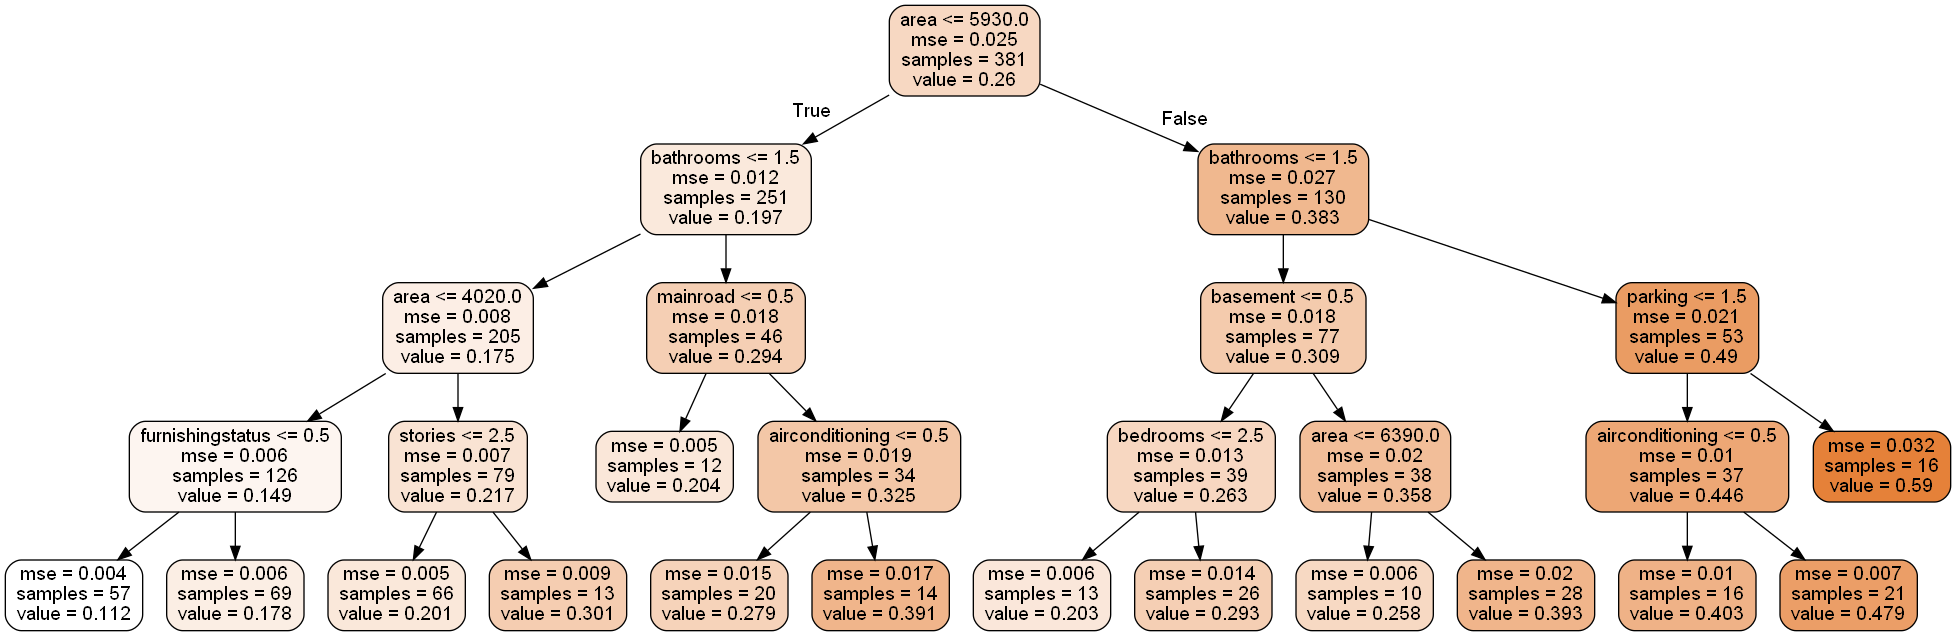

In [134]:
from IPython.display import Image
gph = get_dt_graph(dtree,X_train)
Image(gph.create_png())

So what do we make out of the decision tree:
- Houses with bathrooms less than 1, area less than 4020 and unfurnished are least priced (about 57 samples)
- Houses with bathroom more than 2, having 2 car parking are highly priced (about 16 samples)

In [135]:
y_train_pred = dtree.predict(X_train)
r2_score_train_dtree = r2_score(y_true=y_train, y_pred=y_train_pred)
print ('{:.4f} is the R-squared of train data set with Decision Tree'.format(r2_score_train_dtree))

0.6235 is the R-squared of train data set with Decision Tree


In [136]:
y_test_pred = dtree.predict(X_test)
r2_score_test_dtree = r2_score(y_true=y_test, y_pred=y_test_pred)
print ('{:.4f} is the R-squared of test data set with Decision Tree'.format(r2_score_test_dtree))

0.5290 is the R-squared of test data set with Decision Tree


In [137]:
y_test_pred = lr_model.predict(X_test_sm)
r2_score_test = r2_score(y_true=y_test, y_pred=y_test_pred)
print ('{:.4f} is the R-squared of test data set with MLR'.format(r2_score_test))

0.6714 is the R-squared of test data set with MLR


Even with an untuned decision tree, the R2 score is 0.53. There is scope to tune this with GridSearchCV